In [1]:
from sfa import SparseFactorAnalyzer
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
data_path = 'data/variance_stabilized.csv'
pheno_path = 'data/phenotype.csv'
data = pd.read_csv(data_path, index_col=0)
phenotype = pd.read_csv(pheno_path, index_col=0)

In [4]:
small_data = data.loc[data.var(axis=1).nlargest(10000).index]
small_data = data.loc[small_data.var(axis=1).nsmallest(9500).index]

val_index = np.random.choice(9500, 1000, replace=False)
cross_val_data = small_data.iloc[val_index]

train_index = np.random.choice(8500, 3000, replace=False)
train_data = small_data.drop(cross_val_data.index)
train_data = train_data.iloc[train_index]

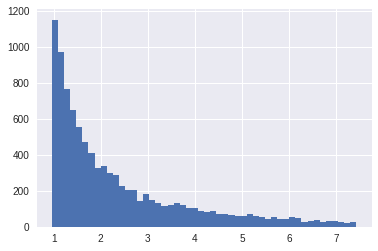

In [5]:
plt.hist(small_data.var(axis=1), bins=50)
plt.show()

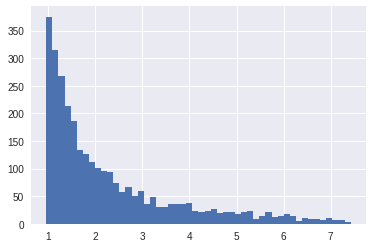

In [6]:
plt.hist(train_data.var(axis=1), bins=50)
plt.show()

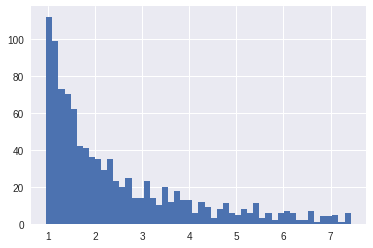

In [7]:
plt.hist(cross_val_data.var(axis=1), bins=50)
plt.show()

In [ ]:
np.random.seed(1)
sfa = SparseFactorAnalyzer(k_components=50, data=train_data)
pickle.dump(sfa, open('output/sfa1', 'wb'))

for i in range(20):
    sfa.ecme(iters=20, structured=False, scale=True, verbose=True)
    pickle.dump(sfa, open('output/sfa1', 'wb'))

updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(0, 'expected log likelihood has improved by:', inf)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(5, 'expected log likelihood has improved by:', 995376.02234600263)
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
updating lambda
updating psi
updating sigma2
updating F
scaling F, sigma2
(10, 'expected log likelihood has improved by:', 12348.6495019908